In [1]:
import numpy as np 
from library.pdf_estimators import * 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.neighbors import KernelDensity
from scipy.integrate import quad

df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


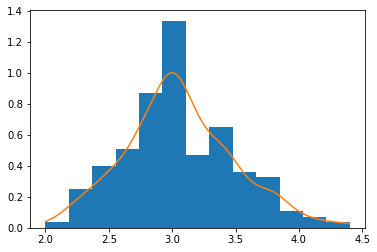

In [2]:
points = kde(df.sepal_width, gaussian)

plt.hist(df.sepal_width, bins='auto', density=True)
plt.plot(np.linspace(df.sepal_width.min(), df.sepal_width.max(), 1000), points)

In [5]:
def kde_univariate(data, kernel):
    """function to estimate the probability density function
       given a feature and a kernel.

    Args:
        data (np.array): Data used to estimate the density function
        kernel (str): kernel used to estimate the density function
    """
    if isinstance(data, pd.Series):
        data = data.to_numpy().reshape(-1, 1)


    iqr = np.subtract(*np.percentile(data, [75, 25]))
    m = np.min([np.sqrt(np.var(data)), iqr / 1.349])
    h = 0.9 * m / np.power(data.size, 1/5)  # Silvermann's optimum estimate

    kde = KernelDensity(kernel=kernel, bandwidth=h).fit(data)
    x_domain = np.linspace(min(data), max(data), 1000)
    pdf = np.exp(kde.score_samples(x_domain))
    
    return kde

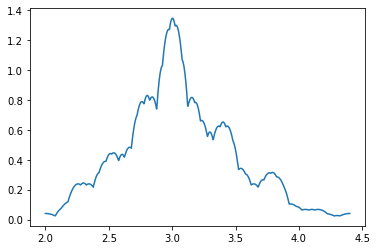

In [14]:
boh = kde_univariate(df.sepal_width, 'epanechnikov')
x_plot = np.linspace(df.sepal_width.min(), df.sepal_width.max(), 1000).reshape(-1, 1)

plt.plot(x_plot, np.exp(boh.score_samples(x_plot)))

In [15]:
quad(boh.score_samples, -np.inf, np.inf)

ValueError: Expected 2D array, got scalar array instead:
array=1.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.